# Percent College Graduates Prediction
---
* Input: `'../data/census_tract_feats.csv'`
* Output: Regression model that predicts the percentage of the age 25+ population that has a college degree in a given census tract

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in original data
df = pd.read_csv('../data/census_tract_feats.csv')
df.head()

,geoID,Total Population:,Population Density (Per Sq. Mile),Total Population: Male,Total Population: White Alone,Total Population: Black or African American Alone,Total Population: American Indian and Alaska Native Alone,Total Population: Asian Alone,Total Population: Native Hawaiian and Other Pacific Islander Alone,Total Population: Some Other Race Alone,...,"Pct. Households: $100,000 to $124,999","Pct. Households: $125,000 to $149,999","Pct. Households: $150,000 to $199,999","Pct. Households: $200,000 or More",Pct. Families below poverty level,Pct. Population for Whom Poverty Status Is Determined: Under 1.00 (Doing Poorly),Pct. Population for Whom Poverty Status Is Determined: 1.00 to 1.99 (Struggling),Pct. Population for Whom Poverty Status Is Determined: Under 2.00 (Poor or Struggling),Number of Accessible Universities,Education Desert
0,1001020100,1845,487.1106,899,1636,96,0,22,0,0,...,0.074271,0.079576,0.090186,0.021220,0.120287,0.106775,0.117073,0.223848,5,0
1,1001020200,2172,1684.0130,1167,913,1184,0,22,14,7,...,0.089400,0.040868,0.015326,0.000000,0.182903,0.224138,0.220588,0.444726,5,0
2,1001020300,3385,1638.9340,1533,2078,896,19,25,12,272,...,0.078968,0.039093,0.027365,0.000000,0.100363,0.146529,0.280650,0.427179,5,0
3,1001020400,4267,1731.4730,2001,3443,356,20,10,0,320,...,0.104631,0.032590,0.038308,0.005146,0.014617,0.022967,0.182564,0.205531,5,0
4,1001020500,9965,2264.4190,5054,7817,1638,0,305,0,0,...,0.178827,0.048164,0.054125,0.020029,0.084132,0.122349,0.133108,0.255457,5,0


In [2]:
# Count education deserts (1), non education deserts (0)
df['Education Desert'].value_counts()

0    63515
1    10230
Name: Education Desert, dtype: int64

In [46]:
# select columns to keep

# label features (sum these up)
bach_and_up_feats = ["Pct. Population 25 Years and Over: Bachelor's Degree",
    "Pct. Population 25 Years and Over: Master's Degree",
    'Pct. Population 25 Years and Over: Professional School Degree',
    'Pct. Population 25 Years and Over: Doctorate Degree'
]

# training features
train_feats = [
    'geoID',
    
    # demographics
    'Total Population:',
    'Population Density (Per Sq. Mile)',
    'Pct. Male', 'Pct. White Alone', 'Pct. Black or African American Alone', 'Pct. American Indian and Alaska Native Alone', 'Pct. Asian Alone', 'Pct. Native Hawaiian and Other Pacific Islander Alone', 'Pct. Some Other Race Alone', 'Pct. Two or More Races', 
    'Pct. Under 5 Years', 'Pct. 5 to 9 Years', 'Pct. 10 to 14 Years', 'Pct. 15 to 17 Years', 'Pct. 18 to 24 Years', 'Pct. 25 to 34 Years', 'Pct. 35 to 44 Years', 'Pct. 45 to 54 Years', 'Pct. 55 to 64 Years', 'Pct. 65 to 74 Years', 'Pct. 75 to 84 Years', 'Pct. 85 Years and Over',
    
    # education - omit post-college features (leakage)
    'Pct. Students enrolled in private school',
    
    # employment
    'Pct. Pop 16+ not in labor force',
    'Pct. Pop 16+ in armed forces',
    'Pct. Pop 16+ unemployed',
    
    # household income
    'Median Gross Rent',
    'Median Household Income (In 2017 Inflation Adjusted Dollars)',
    'Pct. Households: Less than $10,000', 'Pct. Households: $10,000 to $14,999', 'Pct. Households: $15,000 to $19,999', 'Pct. Households: $20,000 to $24,999', 'Pct. Households: $25,000 to $29,999', 'Pct. Households: $30,000 to $34,999', 'Pct. Households: $35,000 to $39,999', 'Pct. Households: $40,000 to $44,999', 'Pct. Households: $45,000 to $49,999', 'Pct. Households: $50,000 to $59,999', 'Pct. Households: $60,000 to $74,999', 'Pct. Households: $75,000 to $99,999', 'Pct. Households: $100,000 to $124,999', 'Pct. Households: $125,000 to $149,999', 'Pct. Households: $150,000 to $199,999', 'Pct. Households: $200,000 or More', 
    
    # poverty
    'Pct. Families below poverty level', 'Pct. Population for Whom Poverty Status Is Determined: Under 1.00 (Doing Poorly)', 'Pct. Population for Whom Poverty Status Is Determined: 1.00 to 1.99 (Struggling)', 'Pct. Population for Whom Poverty Status Is Determined: Under 2.00 (Poor or Struggling)',
    
    # education desert
    'Education Desert'
]

# Only keep selected features
df_train = df[train_feats + bach_and_up_feats]

# only keep non-education deserts -- education oases? (these are the census blocks we want to regress on)
df_deserts = df_train[df_train['Education Desert'] == 1].reset_index(drop=True)
df_nondeserts = df_train[df_train['Education Desert'] == 0].reset_index(drop=True)

# Get training data (non education deserts)
X_nondesert = df_nondeserts.drop(labels=(['geoID', 'Education Desert'] + bach_and_up_feats), axis=1)
y_nondesert = pd.Series(sum([df_nondeserts[feat] for feat in bach_and_up_feats]))

# Get prediction data (education deserts)
X_desert = df_deserts[train_feats].drop(labels=['Education Desert'], axis=1)
y_desert = pd.Series(sum([df_deserts[feat] for feat in bach_and_up_feats]))

print('X_nondeserts shape: ', X_nondesert.shape)
print('y_nondeserts shape: ', y_nondesert.shape)
print('X_deserts shape: ', X_desert.shape)
print('y_deserts shape: ', y_desert.shape)


X_nondeserts shape:  (63515, 48)
y_nondeserts shape:  (63515,)
X_deserts shape:  (10230, 49)
y_deserts shape:  (10230,)


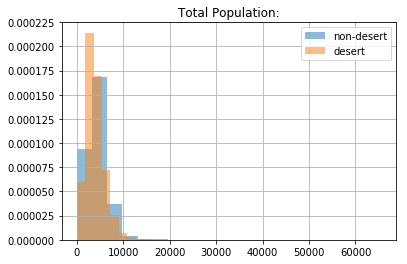

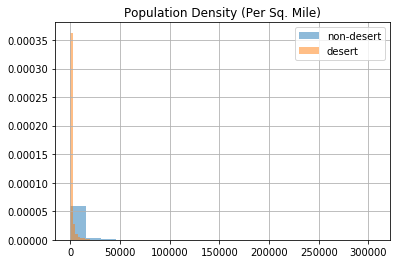

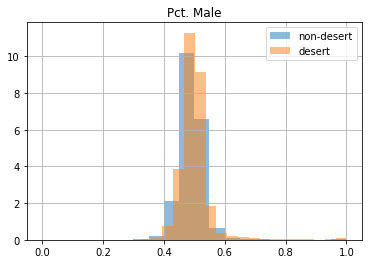

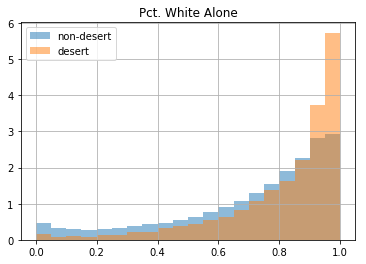

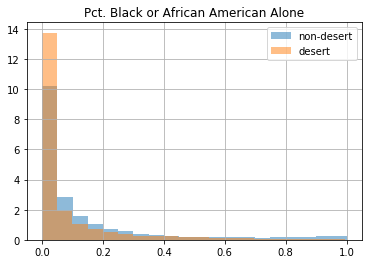

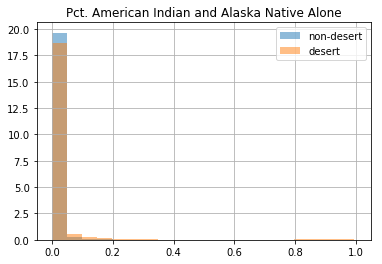

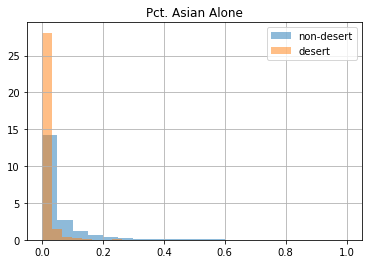

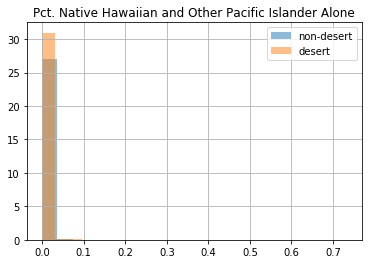

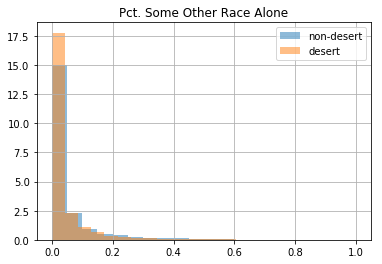

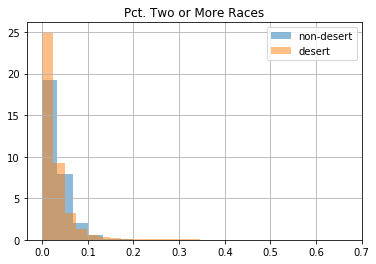

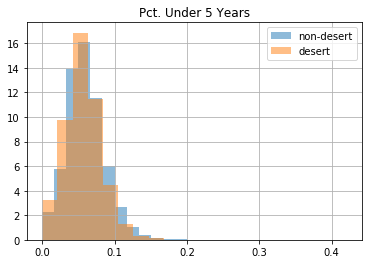

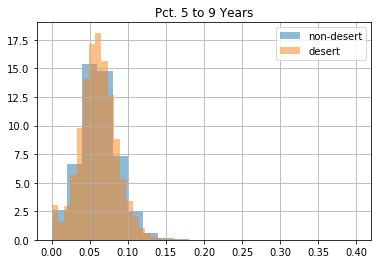

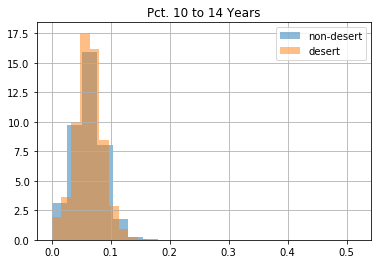

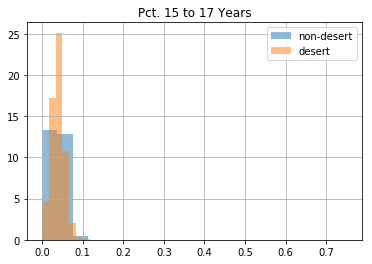

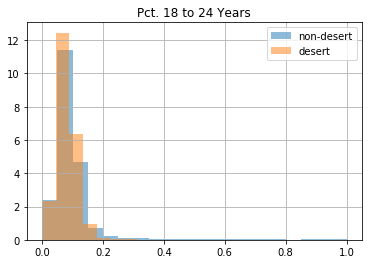

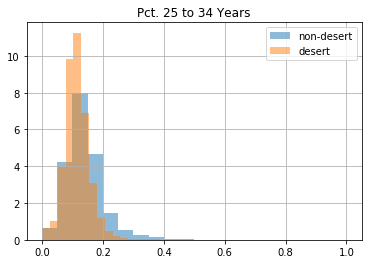

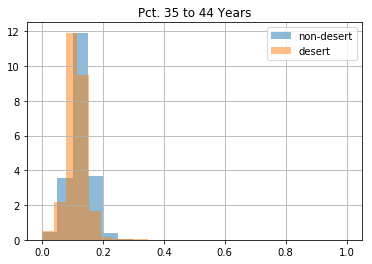

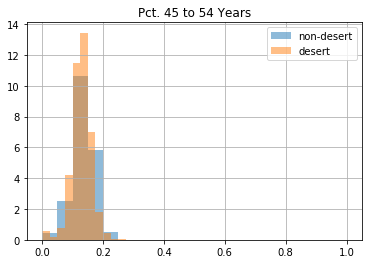

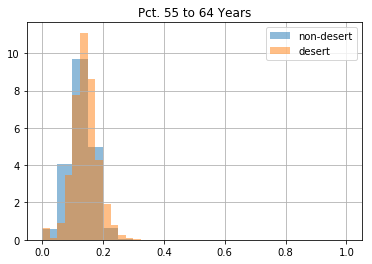

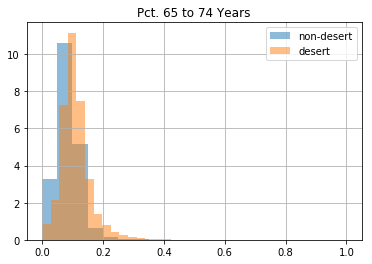

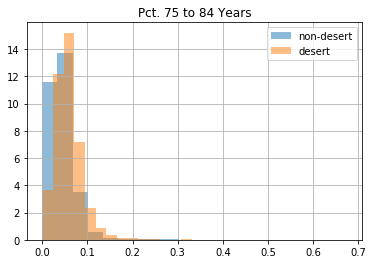

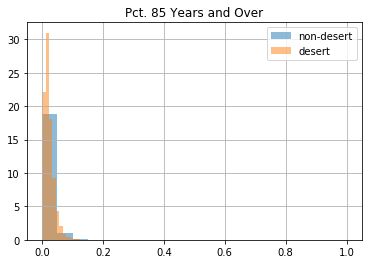

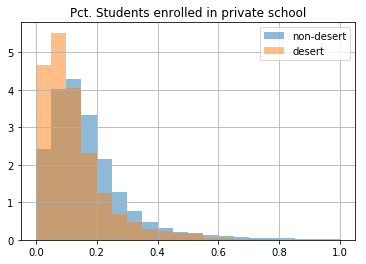

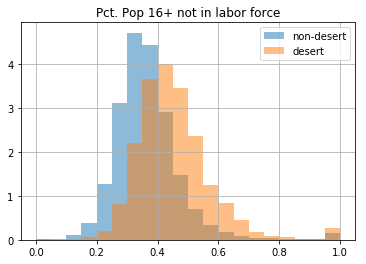

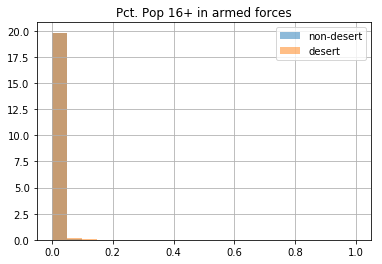

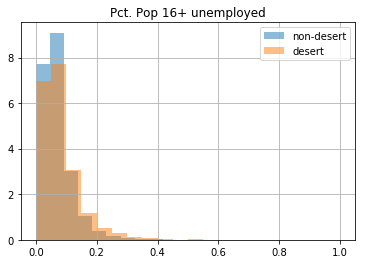

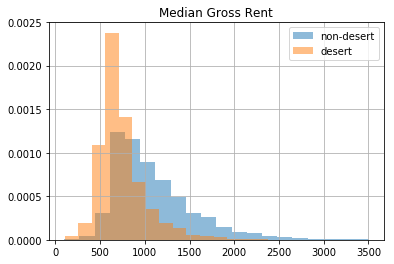

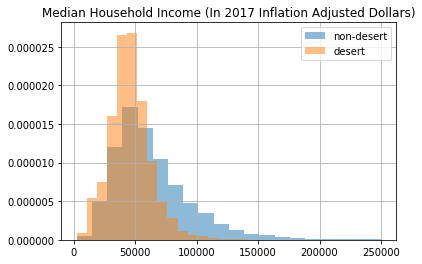

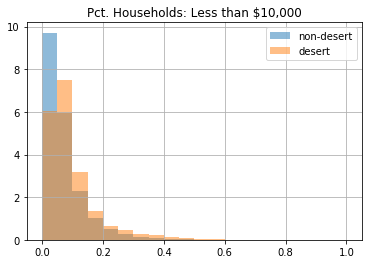

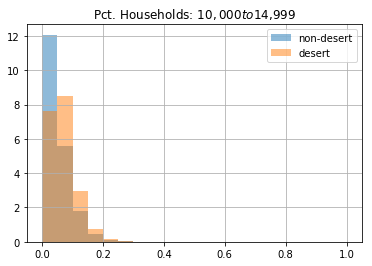

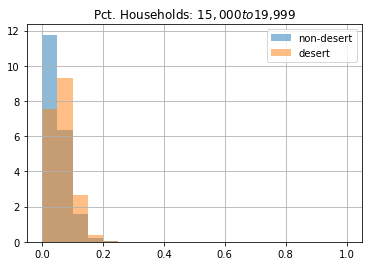

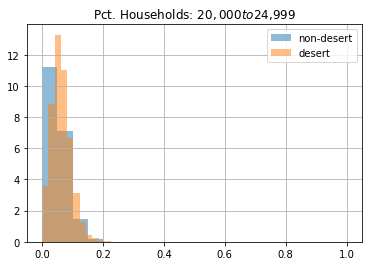

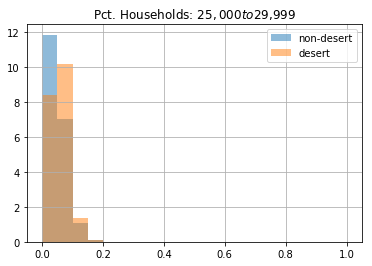

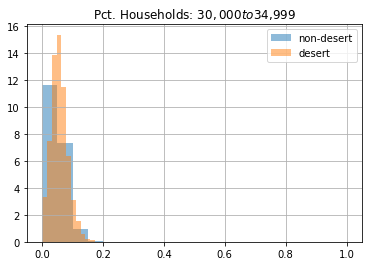

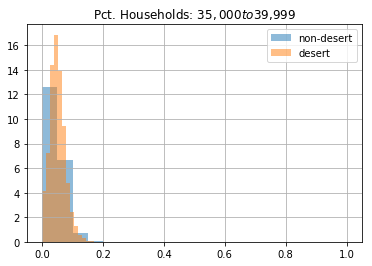

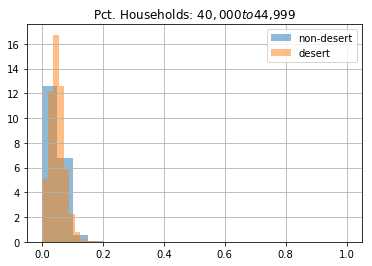

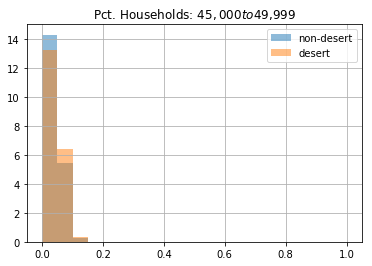

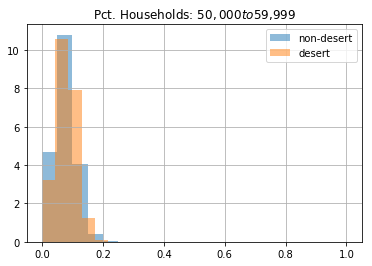

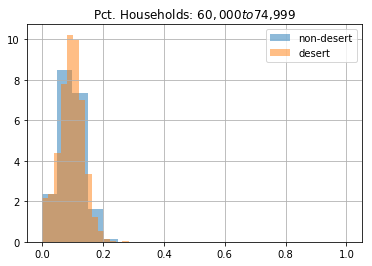

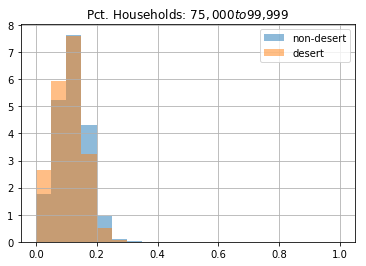

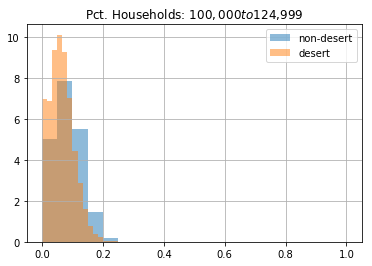

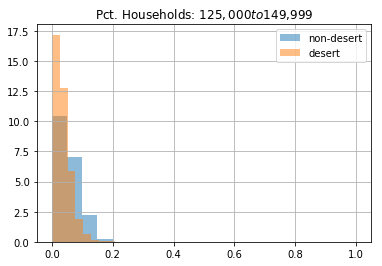

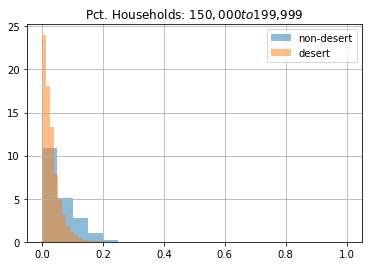

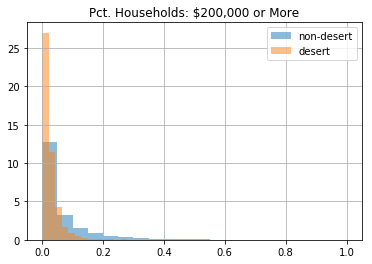

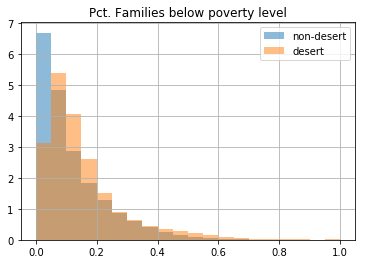

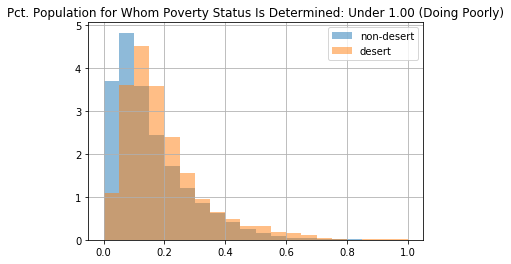

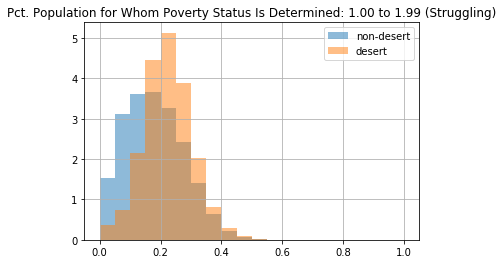

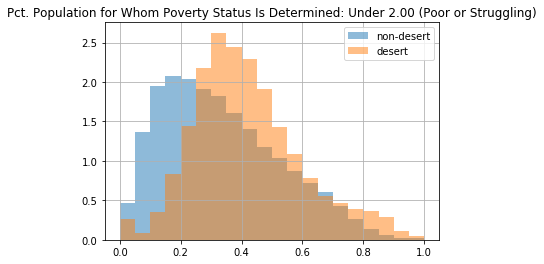

In [7]:
# Feature distributions, across education-deserts vs. non-education-deserts
for feat in X_nondesert.columns:
    non_desert_feat = X_nondesert[feat]
    desert_feat = X_desert[feat]
    plt.hist(non_desert_feat, bins=20, density=True, alpha=0.5, label='non-desert')
    plt.hist(desert_feat, bins=20, density=True, alpha=0.5, label='desert')
    plt.legend(loc='best')
    plt.grid()
    plt.title(feat)
    plt.show()

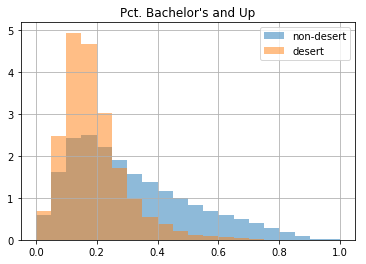

In [9]:
# Label histogram
plt.hist(y_nondesert, bins=20, density=True, alpha=0.5, label='non-desert')
plt.hist(y_desert, bins=20, density=True, alpha=0.5, label='desert')
plt.legend(loc='best')
plt.grid()
plt.title("Pct. Bachelor's and Up")
plt.show()

In [10]:
# Ignore imblearn UserWarning
import warnings
warnings.simplefilter(action="ignore", category=UserWarning)

import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from imblearn import FunctionSampler
import imblearn.pipeline
from collections import defaultdict

# Subsampler for GPR
# n_subsample = 1000
# def subsample(X, y):
#     idx = np.random.choice(np.arange(len(X)), n_subsample, replace=False)
#     return X[idx], y[idx]

# TODO: Use RandomizedSearchCV for hyperparameter tuning
models = {
    'LinearRegression': make_pipeline(StandardScaler(), LinearRegression()),
#     'PolyRegression': make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression()),
#     'SVR': make_pipeline(StandardScaler(), SVR(kernel='rbf')),
#     'RandomForest': make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100)),
#     'MLP': make_pipeline(StandardScaler(), MLPRegressor()),
#     'GaussianProcess': imblearn.pipeline.make_pipeline(StandardScaler(), FunctionSampler(subsample), GaussianProcessRegressor())
}

# Cross validation
metrics = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
cv_results = {}
for name, model in models.items():
    results = cross_validate(model, X_nondesert, y_nondesert, cv=5, scoring=metrics, n_jobs=1)
    cv_results[name] = results

# Convert CV results to Pandas dataframe
pd_results = defaultdict(dict)
for name, results in cv_results.items():
    test_metrics = ['test_' + metric for metric in metrics]
    for test_metric in test_metrics:
        pd_results[name][test_metric] = np.mean(results[test_metric])
    pd_results[name]['fit_time'] = np.mean(results['fit_time'])
        
# Display results
results_df = pd.DataFrame.from_dict(pd_results, orient='index')
results_df

/Users/lucashu/anaconda/envs/sony-ml/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error,fit_time
LinearRegression,0.798041,-0.007663,-0.065437,0.312719


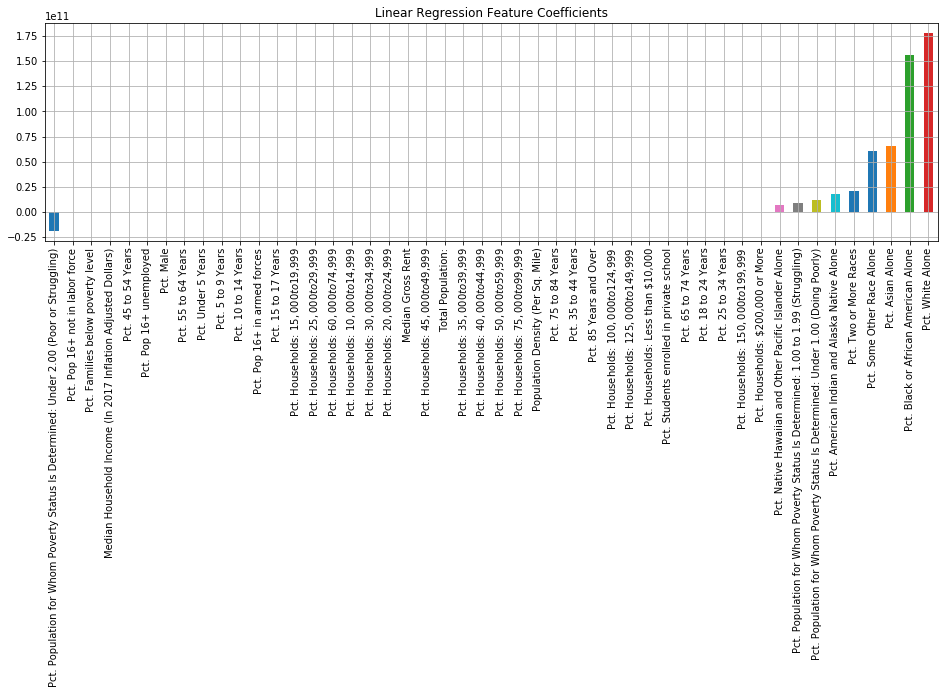

In [12]:
# Linear Regression Feature Coefficients
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
models['LinearRegression'].fit(X_nondesert, y_nondesert)
rgr = models['LinearRegression'].named_steps['linearregression']
coefs = pd.Series(rgr.coef_, index=X_nondesert.columns)
coefs = coefs.sort_values()
coefs.plot(kind="bar")
plt.grid()
plt.title('Linear Regression Feature Coefficients')
plt.show()

In [ ]:
# TODO:
# 1 decision tree
# normalize output
# try models that have (0, 1) output range - beta regression?

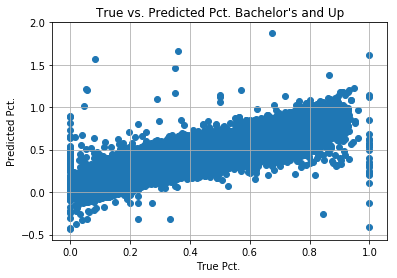

In [14]:
# True vs. Predicted Pct. Bachelor's and Up (On Non-Education Deserts)
from sklearn.model_selection import cross_val_predict
plt.scatter(y_nondesert, cross_val_predict(model, X_nondesert, y_nondesert, cv=5))
plt.title("True vs. Predicted Pct. Bachelor's and Up")
plt.xlabel('True Pct. ')
plt.ylabel('Predicted Pct.')
plt.grid()

In [36]:
from joblib import dump, load

best_model = 'LinearRegression'

# Re-train best model on all data
model = models['LinearRegression']
model.fit(X_nondesert, y_nondesert)
dump(model, '../models/{}.joblib'.format(best_model))

['../models/LinearRegression.joblib']

Pct. Negative Predictions:  0.015347018572825024
Prediction Range: [-0.48274049750317066, 0.8555087090397981]
Mean Prediction:  0.19170574554419592
Median Prediction:  0.18846305115295656
Pct. Census Tracts where pct_bachelors_and_up Increased:  0.5745845552297165


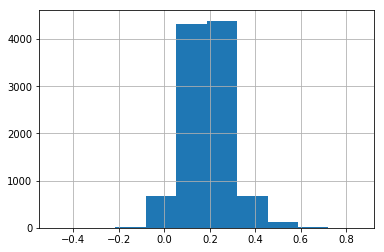

In [56]:
clip = False # clip to 0, 1

# Generate pct_bachelors_and_up predictions on education deserts
# model.named_steps['standardscaler'].fit(X_deserts.drop(['geoID'], axis=1)) # rescale values to education deserts group
y_pred_desert = pd.Series(model.predict(X_deserts.drop(['geoID'], axis=1)), name='pred_pct_bachelors_and_up')
df_pred = pd.concat([X_deserts['geoID'], y_pred_desert], axis=1)

# Clip between (0, 1)
if clip:
    df_pred.loc[:, 'pred_pct_bachelors_and_up'] = np.clip(df_pred['pred_pct_bachelors_and_up'], 0, 1)
    y_pred_desert = np.clip(y_pred_desert, 0, 1)

print('Pct. Negative Predictions: ', np.mean(y_pred_desert < 0))
print('Prediction Range: [{}, {}]'.format(y_pred_desert.min(), y_pred_desert.max()))
print('Mean Prediction: ', y_pred_desert.mean())
print('Median Prediction: ', y_pred_desert.median())
print('Pct. Census Tracts where pct_bachelors_and_up Increased: ', np.mean(y_pred_desert > y_desert))

y_pred_desert.hist()
plt.show()

In [34]:
# save results in CSV
df_pred.to_csv('../data/{}_pct_bachelors_predictions.csv'.format(best_model), 
                   header=['geoID', 'pred_pct_bachelors'], 
                   index=False)
